In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../data/customer_segmentation.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


EDA

In [4]:
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset has 541909 rows and 8 columns.


In [5]:
df.size

4335272

In [6]:
df_1 = df.drop('CustomerID', axis=1)
display(df_1.describe())

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Checking for null values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

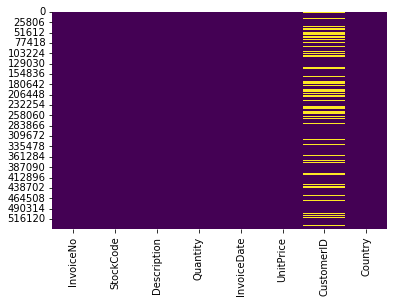

In [8]:
#Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

25% of entries are not assigned to a particular customer.
 it is impossible to impute values for the user and these entries

In [3]:
#dropping na values.
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.shape

(406829, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
# creating a column contains total price of every purchase
df['TotalPrice'] = df['UnitPrice'] * (df['Quantity'])


In [5]:
#the number of products purchased in every transaction
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df_11 = temp.rename(columns = {'InvoiceDate':'Number of products'})
df_11[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


<AxesSubplot:>

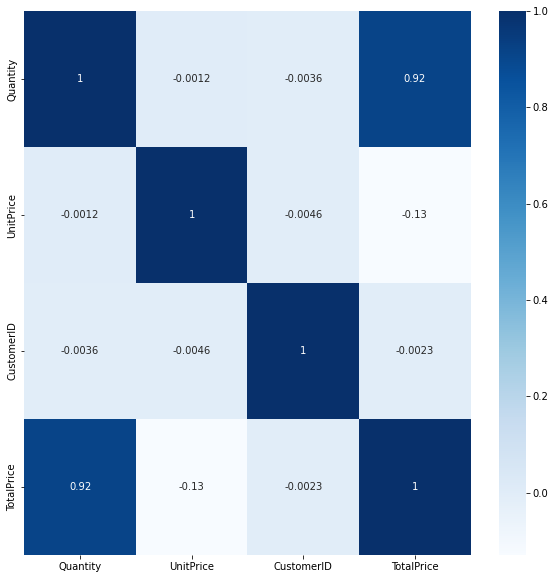

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Low correlation between variables except for quantity and totalprice

<AxesSubplot:xlabel='Country', ylabel='Count'>

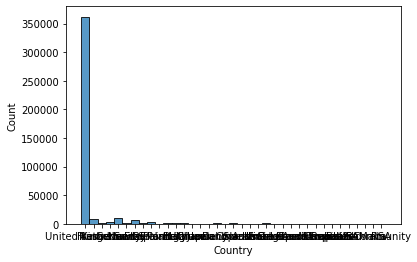

In [16]:
sns.histplot(df.Country,bins=10)

Most customers are from the United Kingdome. 

Text(0, 0.5, 'Country')

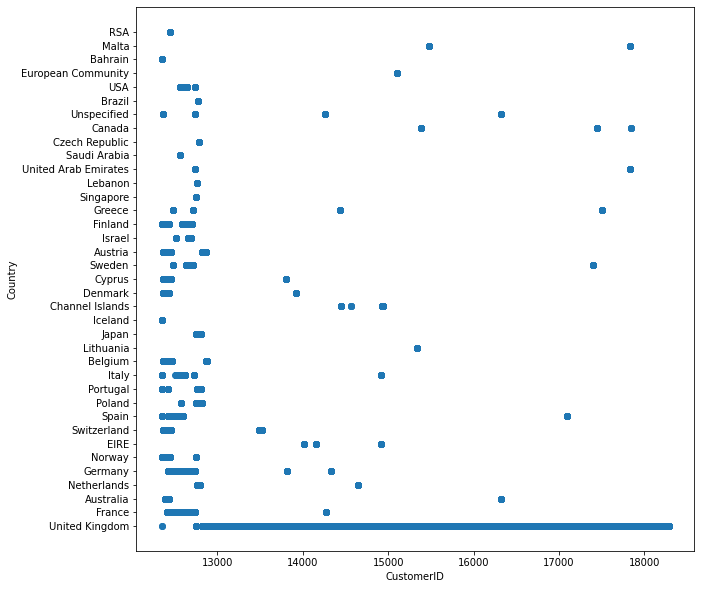

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x='CustomerID',y='Country',data=df)
plt.xlabel('CustomerID')
plt.ylabel('Country')

Visualizing Numeriacal variables with Country as hue.
As its shown the most purchases are from United Kingdom but you can see a litte bit of blue and orange.

C:\Users\lenovo\anaconda3\envs\my-env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


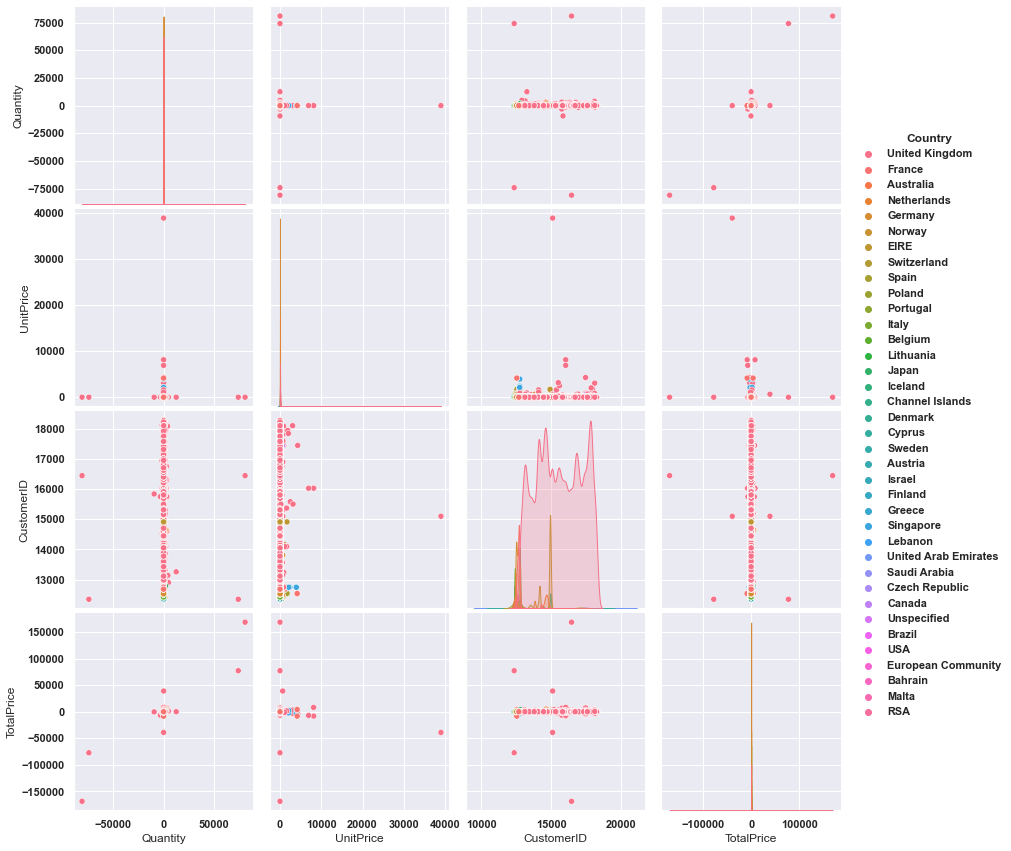

In [125]:
sns.pairplot(df, hue="Country", size=3);
plt.show()